In [1]:
import torch
from torch import nn
import numpy as np
from torch import optim
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from code import card_generators
from code import agent_strategies

In [8]:
def plot_agent_rewards(agent_rewards, plot_always_wrong = False):
    color = iter(plt.cm.rainbow(np.linspace(0, 1, len(agent_rewards))))

    for i, key in enumerate(agent_rewards.keys()):
        c = next(color)
        plt.plot(oracle_rewards - np.cumsum(agent_rewards[key]), color = c, alpha = .5,
            label = key)
    if plot_always_wrong:    
        plt.plot(oracle_rewards, alpha = .5,label = "always wrong")        
    plt.xlabel("Iteration")
    plt.ylabel("Psuedo regret")
    plt.legend()    


def plot_repeated_agent_rewards(results, plot_always_wrong = False):
    for j, rewards in enumerate(results):
        color = iter(plt.cm.rainbow(np.linspace(0, 1, len(rewards))))
        for i, key in enumerate(rewards.keys()):
            c = next(color)
            if j == 0:
                plt.plot(oracle_rewards - np.cumsum(rewards[key]), color = c, alpha = .5,
                    label = key)
            else:
                plt.plot(oracle_rewards - np.cumsum(rewards[key]), color = c, alpha = .5)            
    if plot_always_wrong:    
        plt.plot(oracle_rewards, alpha = .5,label = "always wrong")  
    plt.xlabel("Iteration")
    plt.ylabel("Psuedo regret")
    plt.legend()      

def plot_avg_agent_rewards(results, plot_always_wrong = False):
    all_rewards = {}
    for result in results:
        for key in result.keys():
            if key in all_rewards:
                all_rewards[key].append(result[key])
            else:
                all_rewards[key] = [result[key]]    
    color = iter(plt.cm.rainbow(np.linspace(0, 1, len(rewards))))

    for i, key in enumerate(all_rewards.keys()):
        c = next(color)
        plt.plot(oracle_rewards - np.cumsum(np.mean(all_rewards[key],0)), color = c, 
            label = key) 
    if plot_always_wrong:    
        plt.plot(oracle_rewards, alpha = .5,label = "always wrong") 
    plt.legend()        
    plt.xlabel("Iteration")
    plt.ylabel("Psuedo regret")
    plt.legend()  

In [10]:
%%time
num_plays = 10000

agents = {"random_agent": agent_strategies.RandomDecision(),
          "true_agent":agent_strategies.AlwaysTrue(),
          "optimal_agent":agent_strategies.OptimalDecision(),
          #"linear_agent":LinearMLPDecision(1e-3),
          "linear_agent":agent_strategies.LinearDecision(1e-3),
          "mlp_agent":agent_strategies.MLPDecision(1e-3),
          "false_agent":agent_strategies.AlwaysFalse(),
          }

normal_cards = card_generators.NormalCards(mu=100, sigma = 3)

rewards = card_generators.generate_game(num_iterations=num_plays, 
                        card_generator=normal_cards, 
                        agents=agents
                        )

oracle_rewards = np.cumsum(np.ones_like(range(num_plays)))

CPU times: user 8.83 s, sys: 107 ms, total: 8.94 s
Wall time: 9.43 s


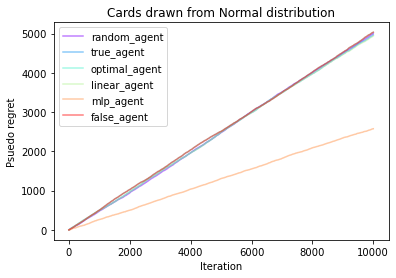

In [11]:
plot_agent_rewards(rewards)
plt.title("Cards drawn from Normal distribution");